### Nonlinear Regression: Saturation-Type Model

We fit the nonlinear model:

$$
y = \frac{a \cdot w}{b + w}, \quad \text{where } w = \frac{x}{2}
$$

This model resembles saturation kinetics and is useful for systems where growth or response slows at higher input levels.

#### Data

| $x$    | $y$     |
|--------|---------|
| 0.5    | 1.255   |
| 0.387  | 1.25    |
| 0.24   | 1.189   |
| 0.136  | 1.124   |
| 0.04   | 0.783   |
| 0.011  | 0.402   |

#### Initial Guesses

- $ a = 2 $
- $ b = 1 $

We estimate parameters using `scipy.optimize.curve_fit`, and report:
- 95% confidence intervals
- $ R^2 $, adjusted $ R^2 $
- RMSD and residual variance

### Load Required Libraries

In [4]:
# Load Required Librarie
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t

### Define Data and Model

In [5]:
# Raw data
x_data = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
y_data = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])

# Define w = x / 2
def w(x):
    return x / 2

# Nonlinear model: y = a * w / (b + w)
def model(x, a, b):
    return a * w(x) / (b + w(x))

### Fit Model and Compute Statistics

In [3]:
# Initial guess
initial_guess = [2, 1]

# Fit model
popt, pcov = curve_fit(model, x_data, y_data, p0=initial_guess)
a, b = popt

# Degrees of freedom
n = len(x_data)
p = len(popt)
dof = n - p

# Standard errors and confidence intervals
stderr = np.sqrt(np.diag(pcov))
alpha = 0.05
tval = t.ppf(1 - alpha/2, dof)
ci_a = (a - tval * stderr[0], a + tval * stderr[0])
ci_b = (b - tval * stderr[1], b + tval * stderr[1])

# Predictions and residuals
y_pred = model(x_data, *popt)
residuals = y_data - y_pred

# Goodness-of-fit metrics
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r2 = 1 - ss_res / ss_tot
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p)
rmsd = np.sqrt(ss_res / dof)
variance = ss_res / dof

### Display Results

In [6]:
print("Nonlinear Regression Results:")
print(f"  a = {a:.6f}")
print(f"  b = {b:.6f}")
print(f"  95% CI for a = [{ci_a[0]:.6f}, {ci_a[1]:.6f}]")
print(f"  95% CI for b = [{ci_b[0]:.6f}, {ci_b[1]:.6f}]")
print(f"  R²           = {r2:.4f}")
print(f"  Adjusted R²  = {r2_adj:.4f}")
print(f"  RMSD         = {rmsd:.4f}")
print(f"  Variance     = {variance:.4f}")

Nonlinear Regression Results:
  a = 1.327531
  b = 0.013231
  95% CI for a = [1.300537, 1.354526]
  95% CI for b = [0.011804, 0.014658]
  R²           = 0.9988
  Adjusted R²  = 0.9985
  RMSD         = 0.0132
  Variance     = 0.0002


### Plot Regression Fit

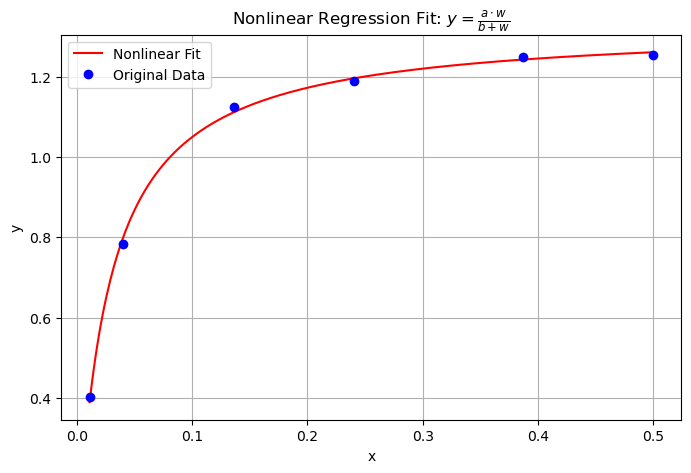

In [7]:
# Smooth curve for plotting
x_fit = np.linspace(min(x_data), max(x_data), 300)
y_fit = model(x_fit, *popt)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_fit, y_fit, color='red', label='Nonlinear Fit')
plt.plot(x_data, y_data, 'o', color='blue', label='Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Regression Fit: $y = \\frac{a \\cdot w}{b + w}$')
plt.grid(True)
plt.legend()
plt.show()

### Plot Residuals

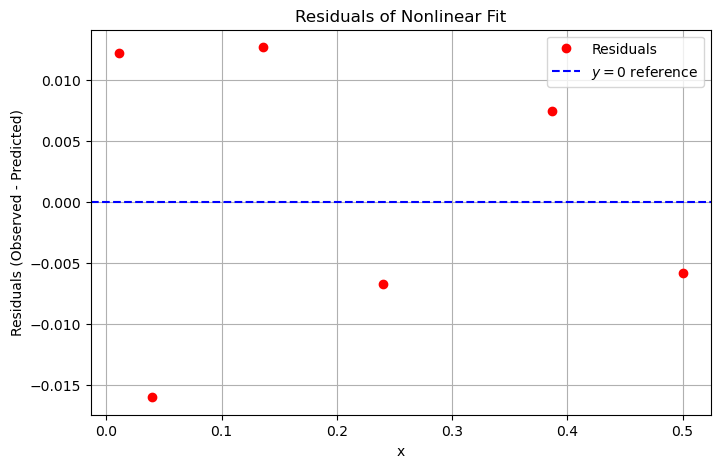

In [8]:
# Plot residuals
plt.figure(figsize=(8, 5))
plt.plot(x_data, residuals, 'o', color='red', label='Residuals')
plt.axhline(0, color='blue', linestyle='--', label='$y=0$ reference')
plt.xlabel('x')
plt.ylabel('Residuals (Observed - Predicted)')
plt.title('Residuals of Nonlinear Fit')
plt.grid(True)
plt.legend()
plt.show()

